In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import timedelta
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)




In [25]:
# 1. Load the dataset
if use_synthetic_data:
    print("--- NOTE: Using Synthetic Data for Demonstration ---")
    df = create_synthetic_data()
else:
    # Ensure the file exists in your directory
    df = pd.read_excel('Nigerian E-Commerce Dataset.xlsx')

print("First 10 rows of the raw dataset:")
display(df.head(10))

# 2. Remove duplicates and handle missing values
initial_shape = df.shape
df = df.drop_duplicates()
df = df.dropna() # Dropping rows with missing values for this context

print(f"\nData Cleaning Summary:")
print(f"Original Shape: {initial_shape}")
print(f"Shape after cleaning: {df.shape}")

First 10 rows of the raw dataset:


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye
5,4670,Lagos,TDILIFE,TDILIFE,False,608043c969c51b4e80e70314,HOLLANDIA EVAP MILK FULL CREAM 120g X 24,2760.00,ML39SRTWZAW0QRQZCVEUBCGW,Delivered,1,1,2760.00,2021-05-31,Lagos,Ifako-Ijaye
6,4669,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2O0EB2MZNKSXAPFEKGG0JW,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
7,4669,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLJG03AA1NG0Y1EZBKFH88SG,Cancelled,1,1,4950.00,2021-05-31,Lagos,Alimosho
8,4668,Lagos,TDILIFE,TDILIFE,False,60b0cef62498ec1dd3805329,CHIVITA HAPPY HOUR - 150MLX24,1076.25,ML03X81AHZV026P0L0BCTSLW,Cancelled,1,1,1076.25,2021-05-31,Lagos,Alimosho
9,4668,Lagos,TDILIFE,TDILIFE,False,60b4d9352498ec1dd38053b6,CHIVITA ACTIVE 1LX10,4253.75,MLL1NIQOQDTEMWTIE07D20JW,Cancelled,1,1,4253.75,2021-05-31,Lagos,Alimosho



Data Cleaning Summary:
Original Shape: (3928, 16)
Shape after cleaning: (2899, 16)


In [10]:
# Pre-calc: Create TotalPurchase (Transaction Value) if not exists
# Calculate TotalPurchase (Transaction Value)
if 'TotalPurchase' not in df.columns:
    df['TotalPurchase'] = df['Quantity'] * df['Item Price']

# Check the first few rows
display(df[['Quantity', 'Item Price', 'TotalPurchase']].head(10))


# 3. Normalise purchase value and order frequency (Quantity)
scaler_minmax = MinMaxScaler()
df['Normalized_Purchase_Value'] = scaler_minmax.fit_transform(df[['TotalPurchase']])
df['Normalized_Quantity'] = scaler_minmax.fit_transform(df[['Quantity']])

print("Normalization complete. Columns added: 'Normalized_Purchase_Value', 'Normalized_Quantity'")

# 4. Encode categorical features
categorical_cols = ['Region'] # Adjust based on actual dataset columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[f'{col}_Encoded'] = le.fit_transform(df[col])

print("Categorical Encoding complete.")
display(df.head())

,Quantity,Item Price,TotalPurchase
0,1,4950.00,4950.00
1,2,3392.75,6785.50
2,1,3392.75,3392.75
3,1,3370.00,3370.00
4,1,4845.00,4845.00
5,1,2760.00,2760.00
6,2,3392.75,6785.50
7,1,4950.00,4950.00
8,1,1076.25,1076.25
9,1,4253.75,4253.75


Normalization complete. Columns added: 'Normalized_Purchase_Value', 'Normalized_Quantity'
Categorical Encoding complete.


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area,TotalPurchase,Normalized_Purchase_Value,Normalized_Quantity
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye,4950.00,0.000065,0.00000
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye,6785.50,0.000089,0.00012
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye,3392.75,0.000045,0.00000
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye,3370.00,0.000044,0.00000
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye,4845.00,0.000064,0.00000


In [9]:
print(df.columns)


Index(['Order ID', 'Branch Location', 'Branch Name', 'Business Name',
       'Is Deleted', 'Item ID', 'Item Name', 'Item Price', 'Order Item Number',
       'Item Status', 'Packed Quantity', 'Quantity', 'Total Price',
       'Order Date', 'Order Region', 'Order Local Area'],
      dtype='object')


--- Descriptive Statistics for Numeric Variables ---


,TotalPurchase,Quantity,Item Price
count,2.899000e+03,2899.000000,2899.000000
mean,4.100717e+05,49.654709,7333.418504
std,2.243405e+06,252.365597,15258.219137
min,0.000000e+00,1.000000,0.000000
25%,8.200000e+03,1.000000,3150.000000
50%,1.998750e+04,5.000000,7790.000000
75%,9.170000e+04,20.000000,9300.000000
max,7.599990e+07,8306.000000,485000.000000


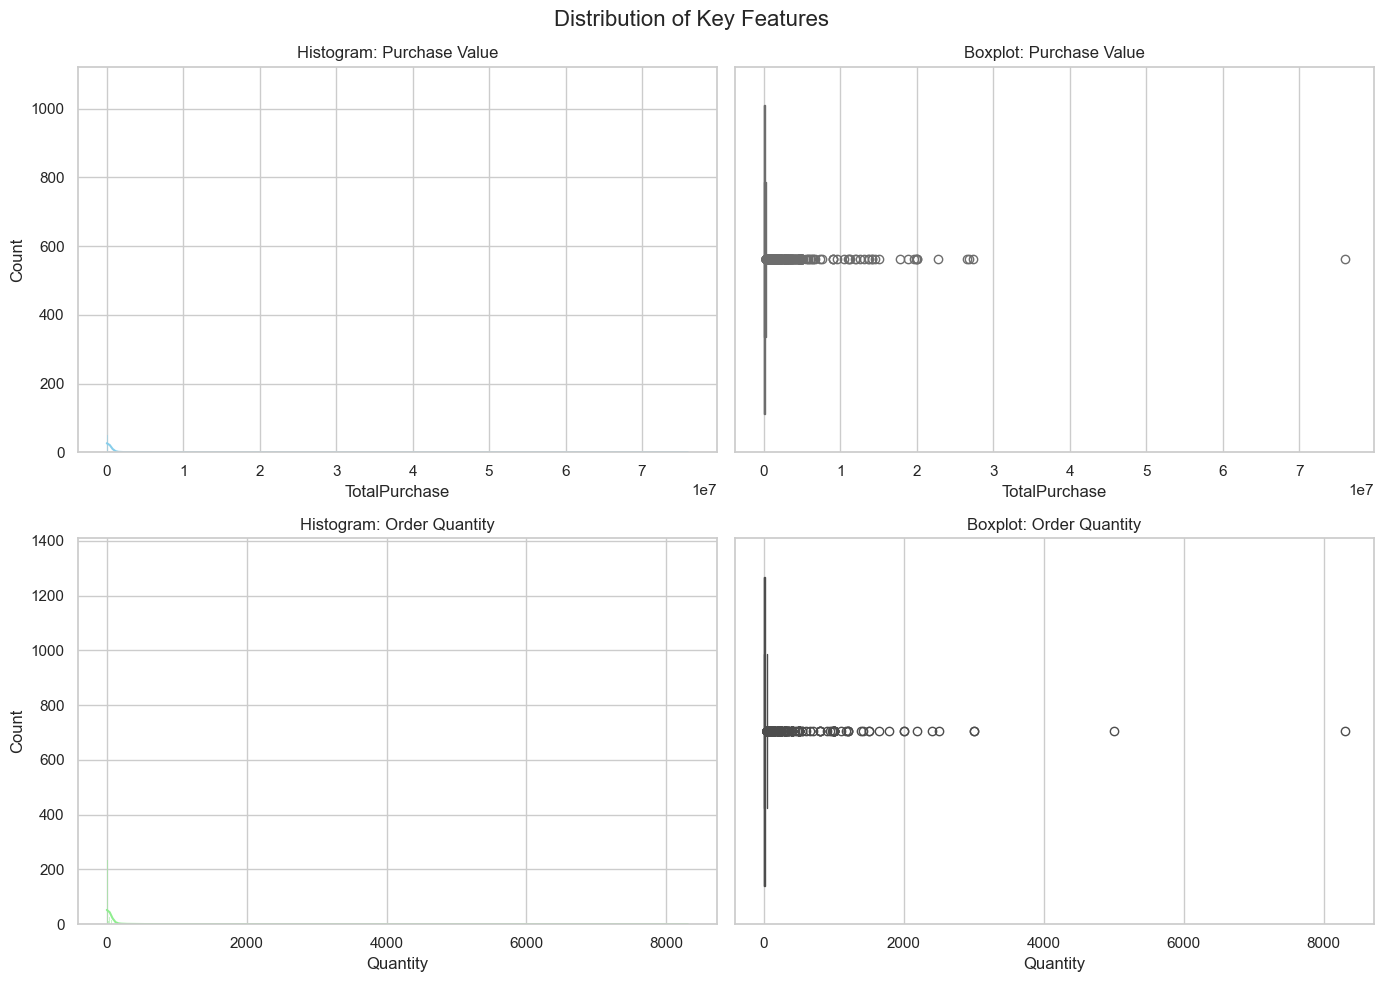

In [12]:
# 1. Descriptive Statistics
# 1. Descriptive Statistics
print("--- Descriptive Statistics for Numeric Variables ---")
display(df[['TotalPurchase', 'Quantity', 'Item Price']].describe())


# 2. Histograms and Boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Features', fontsize=16)

# Purchase Value
sns.histplot(df['TotalPurchase'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram: Purchase Value')
sns.boxplot(x=df['TotalPurchase'], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Boxplot: Purchase Value')

# Quantity
sns.histplot(df['Quantity'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Histogram: Order Quantity')
sns.boxplot(x=df['Quantity'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot: Order Quantity')

plt.tight_layout()
plt.show()

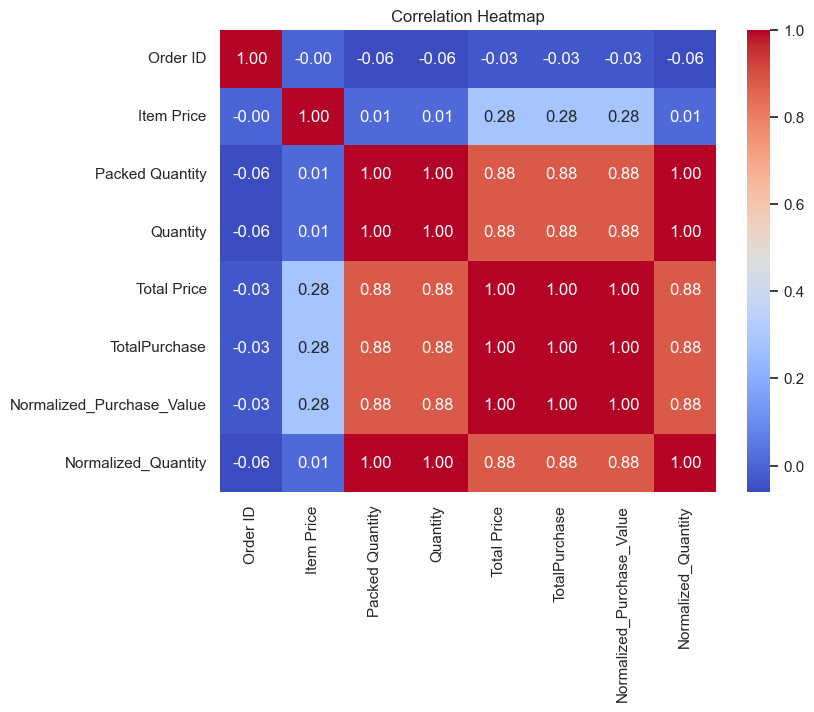

Interpretation: Look for strong relationships between Quantity and TotalPurchase.


In [13]:
# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
# Select numeric cols only
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['CustomerID'], errors='ignore')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print("Interpretation: Look for strong relationships between Quantity and TotalPurchase.")

In [16]:
from datetime import timedelta
import pandas as pd

# Ensure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create TotalPurchase if it doesn't exist
if 'TotalPurchase' not in df.columns:
    df['TotalPurchase'] = df['Quantity'] * df['Item Price']

# Snapshot date (one day after the last order)
snapshot_date = df['Order Date'].max() + timedelta(days=1)

# Group by customer (Business Name)
customer_df = df.groupby('Business Name').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'count',                                     # Frequency
    'TotalPurchase': 'sum',                                  # Monetary Sum
    'Quantity': 'mean'                                       # Avg Quantity
}).reset_index()

# Rename columns
customer_df.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'TotalPurchase': 'Monetary_Sum',
    'Quantity': 'Avg_Quantity',
    'Business Name': 'Customer'
}, inplace=True)

# Calculate Average Purchase Value
customer_df['Avg_Purchase_Value'] = customer_df['Monetary_Sum'] / customer_df['Frequency']

print("Data aggregated to Customer Level.")
display(customer_df.head())


Data aggregated to Customer Level.


,Customer,Recency,Frequency,Monetary_Sum,Avg_Quantity,Avg_Purchase_Value
0,Deeski Store Limited,2,408,7.814518e+07,27.387255,1.915323e+05
1,Ecopeaks Limited,3,176,4.119341e+07,24.994318,2.340535e+05
2,Ekulo International Limited(Wine world),11,1,9.491500e+03,1.000000,9.491500e+03
3,Extreme Manufacturing Nigeria limited,36,7,3.068000e+04,2.000000,4.382857e+03
4,Farmer First,1,24,1.359654e+08,315.958333,5.665225e+06


In [18]:

# 1. Create Derived Features
# A. Loyalty Index: Frequency * Avg Purchase Value
customer_df['Loyalty_Index'] = customer_df['Frequency'] * customer_df['Avg_Purchase_Value']

# B. Recency Score: Already calculated as 'Recency' in days

# C. Customer Value Tier: Quantile-based categorization
customer_df['Value_Tier'] = pd.qcut(customer_df['Monetary_Sum'], q=3, labels=['Low', 'Medium', 'High'])

# D. Engagement Score: Frequency / log(Recency)
customer_df['Engagement_Score'] = customer_df['Frequency'] / np.log1p(customer_df['Recency'])

print("Feature Engineering Complete. New columns added.")
display(customer_df[['Customer', 'Loyalty_Index', 'Value_Tier', 'Engagement_Score']].head())


Feature Engineering Complete. New columns added.


,Customer,Loyalty_Index,Value_Tier,Engagement_Score
0,Deeski Store Limited,7.814518e+07,High,371.377604
1,Ecopeaks Limited,4.119341e+07,High,126.957164
2,Ekulo International Limited(Wine world),9.491500e+03,Low,0.402430
3,Extreme Manufacturing Nigeria limited,3.068000e+04,Low,1.938565
4,Farmer First,1.359654e+08,High,34.624681


In [19]:
# Prepare data 
features = ['Recency', 'Frequency', 'Monetary_Sum', 'Loyalty_Index']
X = customer_df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled and ready for clustering.")

Data scaled and ready for clustering.


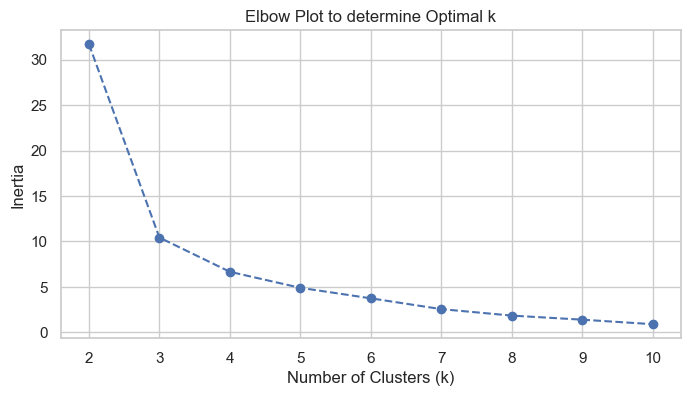

In [20]:
# 1. Apply K-Means & 2. Elbow Plot
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot to determine Optimal k')
plt.show()

--- Optimal k selected: 3 ---


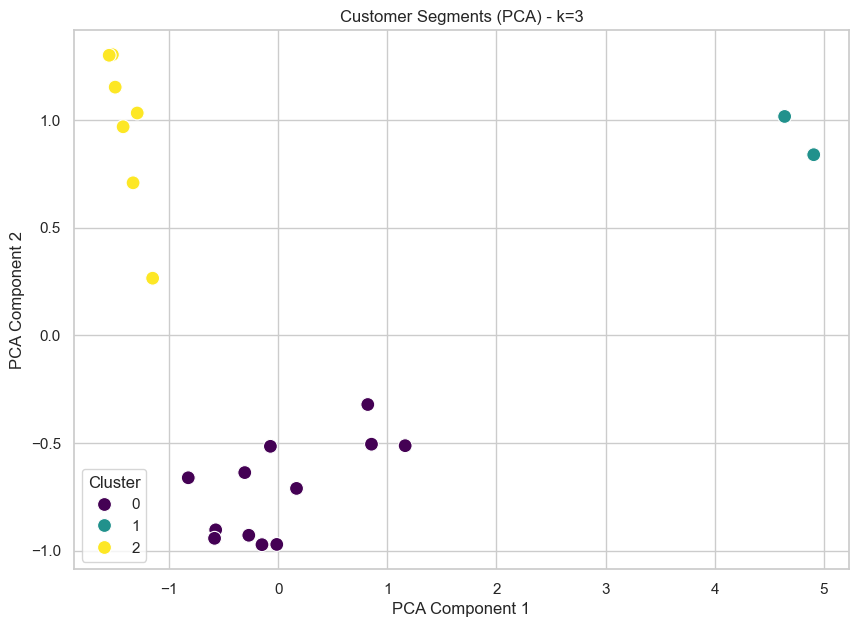

--- Optimal k selected: 3 ---
PCA1 and PCA2 columns added to customer_df.


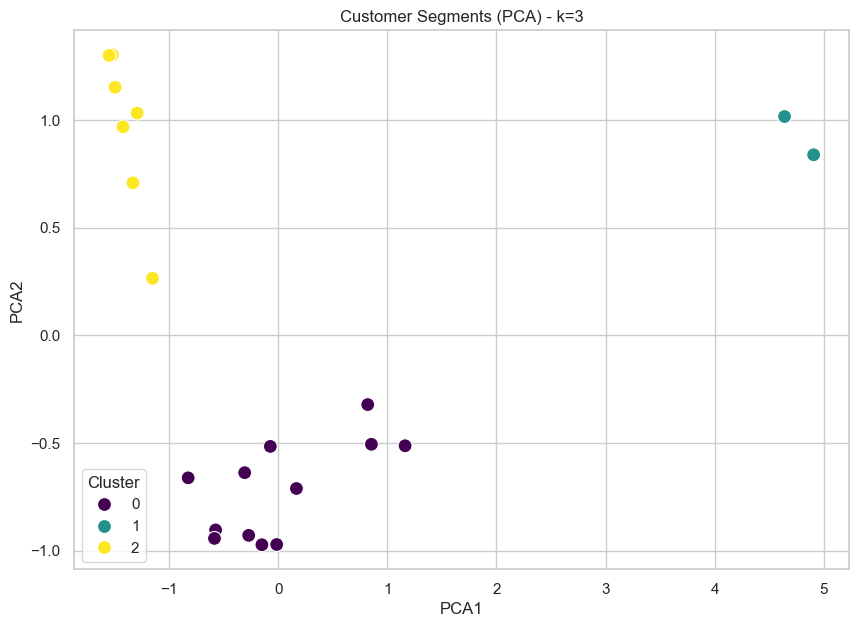

In [32]:
# 3. Select Optimal k (Assuming 3 based on typical elbow behavior)
optimal_k = 3
print(f"--- Optimal k selected: {optimal_k} ---")

# Run Final Model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 4. PCA 2D Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=customer_df['Cluster'], palette='viridis', s=100)
plt.title(f'Customer Segments (PCA) - k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
# --- CELL 10: Part D - Final Clustering & Visualization ---

# 1. Select Optimal k (We selected 3 based on the Elbow Plot)
optimal_k = 3
print(f"--- Optimal k selected: {optimal_k} ---")

# 2. Run Final K-Means Model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 3. Calculate PCA Components
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# --- NEW CODE ADDED HERE ---
# Save the PCA data into the DataFrame columns
customer_df['PCA1'] = components[:, 0]
customer_df['PCA2'] = components[:, 1]
print("PCA1 and PCA2 columns added to customer_df.")
# ---------------------------

# 4. Visualise using the new columns
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=customer_df, 
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    palette='viridis', 
    s=100
)
plt.title(f'Customer Segments (PCA) - k={optimal_k}')
plt.show()

In [22]:
# 5. Cluster Profile Summary
summary = customer_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary_Sum', 'Loyalty_Index']].mean()
summary['Count'] = customer_df['Cluster'].value_counts()

print("--- Cluster Profile Summary ---")
display(summary)

print("\n--- Interpretation Guide ---")
print("High Monetary/Frequency + Low Recency = VIP/Loyal Customers")
print("High Recency + Low Frequency = Churned/At-Risk Customers")
print("Low Monetary + Low Frequency = New or Low-Value Customers")

--- Cluster Profile Summary ---


,Recency,Frequency,Monetary_Sum,Loyalty_Index,Count
Cluster,,,,,
0,3.416667,127.833333,3.913555e+07,3.913555e+07,12
1,1.000000,670.000000,3.531051e+08,3.531051e+08,2
2,54.571429,3.571429,1.851566e+06,1.851566e+06,7



--- Interpretation Guide ---
High Monetary/Frequency + Low Recency = VIP/Loyal Customers
High Recency + Low Frequency = Churned/At-Risk Customers
Low Monetary + Low Frequency = New or Low-Value Customers


In [31]:
# Merge transaction data with customer-level metrics
# Left merge keeps all transactions and attaches customer features
merged_df = df.merge(
    customer_df,
    left_on='Business Name',   # transaction-level customer identifier
    right_on='Customer',       # aggregated customer identifier
    how='left'
)

# Drop the redundant 'Customer' column if needed
merged_df.drop(columns=['Customer'], inplace=True)

# Save the combined dataset
merged_df.to_csv('nigerian_ecommerce_cleaned_full_dataset.csv', index=False)
print("Success: Full cleaned dataset saved to 'nigerian_ecommerce_cleaned_full_dataset.csv'")


Success: Full cleaned dataset saved to 'nigerian_ecommerce_cleaned_full_dataset.csv'


In [28]:
# --- Save Cleaned Transaction Data (After Part A/B) ---
# This saves the data with duplicates removed and missing values handled
df.to_csv('nigerian_ecommerce_cleaned_transactions.csv', index=False)
print("Success: Cleaned transaction data saved to 'nigerian_ecommerce_cleaned_transactions.csv'")

# --- Save Final Segmented Data (After Part D) ---
# This saves the customer profiles with their Cluster labels and calculated scores
customer_df.to_csv('nigerian_ecommerce_customer_segments.csv', index=False)
print("Success: Customer segments saved to 'nigerian_ecommerce_customer_segments.csv'")

Success: Cleaned transaction data saved to 'nigerian_ecommerce_cleaned_transactions.csv'
Success: Customer segments saved to 'nigerian_ecommerce_customer_segments.csv'


In [33]:
# --- NEW CELL: Export Final Cleaned Data ---

# Create a copy to serve as the final dataset
final_cleaned_data = customer_df.copy()

# Sort by Cluster for easier reading
final_cleaned_data = final_cleaned_data.sort_values(by='Cluster')

# Display the first few rows to verify PCA1, PCA2, and Cluster are there
print("--- Final Cleaned Dataset Preview ---")
display(final_cleaned_data.head())

# Save to CSV (This creates the file in your folder)
final_cleaned_data.to_csv('final_cleaned_customer_data.csv', index=False)
print("\nSuccess! The dataset has been saved as 'final_cleaned_customer_data.csv'")

--- Final Cleaned Dataset Preview ---


,Customer,Recency,Frequency,Monetary_Sum,Avg_Quantity,Avg_Purchase_Value,Loyalty_Index,Value_Tier,Engagement_Score,Cluster,PCA1,PCA2
0,Deeski Store Limited,2,408,7.814518e+07,27.387255,1.915323e+05,7.814518e+07,High,371.377604,0,1.163194,-0.512785
1,Ecopeaks Limited,3,176,4.119341e+07,24.994318,2.340535e+05,4.119341e+07,High,126.957164,0,0.167386,-0.711269
2,Ekulo International Limited(Wine world),11,1,9.491500e+03,1.000000,9.491500e+03,9.491500e+03,Low,0.402430,0,-0.824835,-0.661830
4,Farmer First,1,24,1.359654e+08,315.958333,5.665225e+06,1.359654e+08,High,34.624681,0,0.820645,-0.321558
7,Generic Stores,1,195,4.449291e+06,12.369231,2.281688e+04,4.449291e+06,Medium,281.325533,0,-0.149135,-0.972634



Success! The dataset has been saved as 'final_cleaned_customer_data.csv'
